In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
sns.set_style('whitegrid')

In [13]:
df= pd.read_csv('titanic_train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
target_col= 'Survived'
cat_cols= ['Pclass', 'Sex', 'Embarked']
num_cols= ['Age', 'SibSp', 'Parch','Fare']
drop_cols= ['PassengerId','Name','Ticket','Cabin']

## Univariate analysis

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


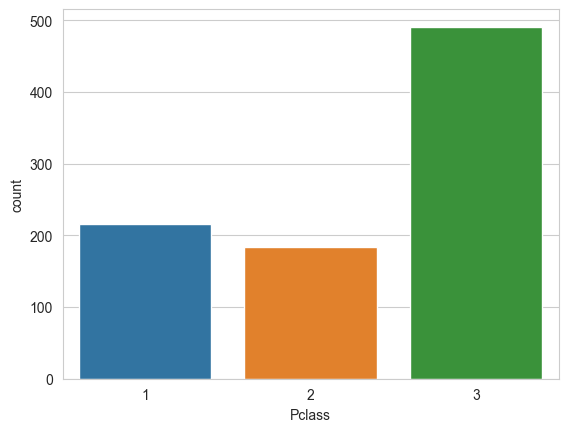

Sex
female    314
male      577
Name: Sex, dtype: int64


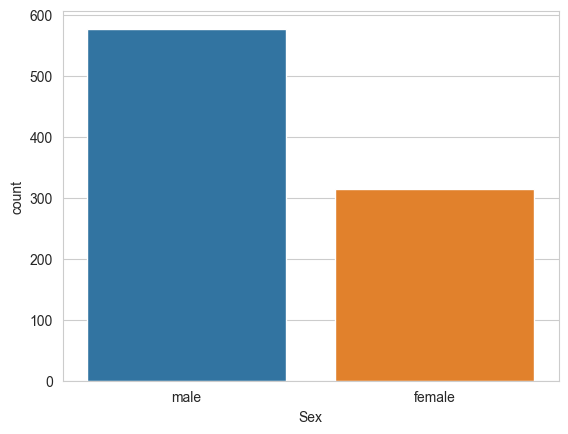

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


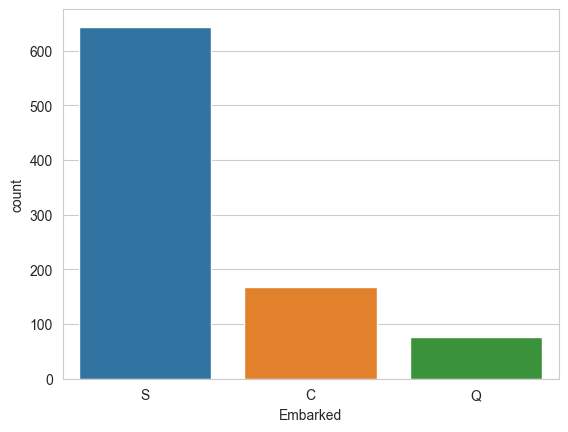

In [18]:
def cat_analyse(col):
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data=df, x=col)
    plt.show()

for col in cat_cols:
    cat_analyse(col)

Age


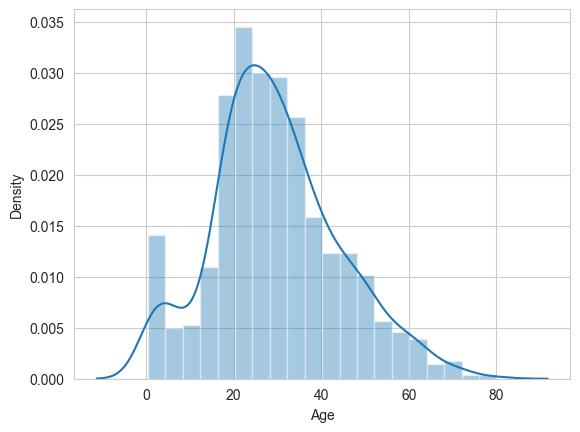

SibSp


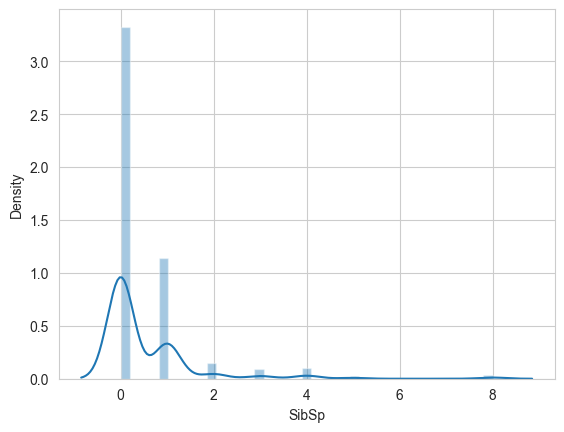

Parch


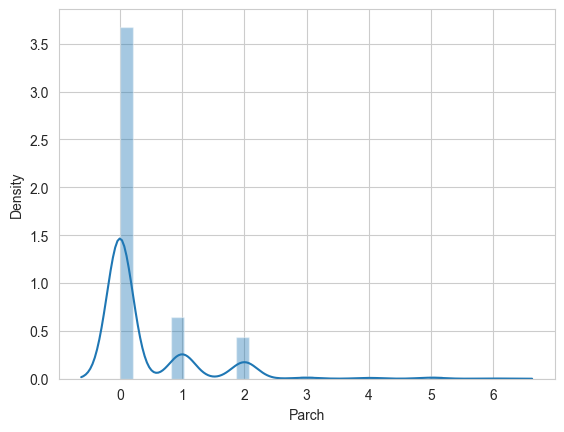

Fare


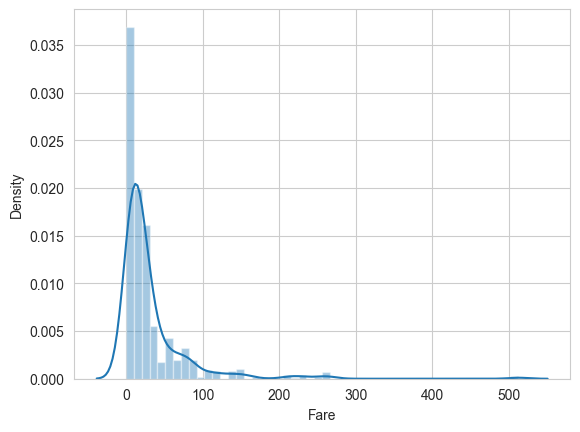

In [19]:
def num_analyse(col):
    print(col)
    sns.distplot(df[col])
    plt.show()

for col in num_cols:
    num_analyse(col)

## Bivariate Analysis

Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


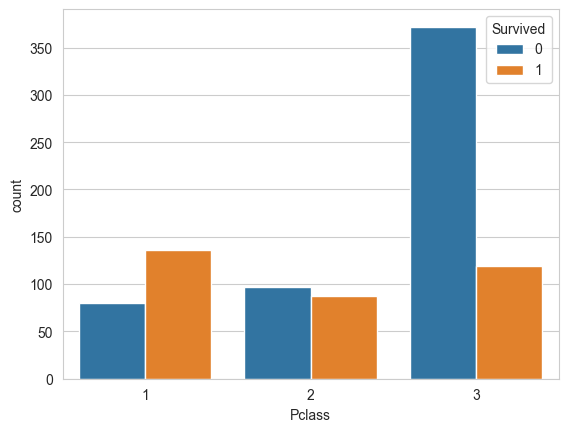

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


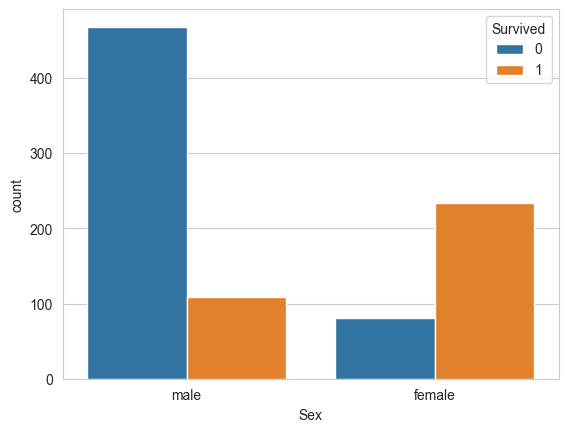

Embarked
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Embarked, dtype: int64


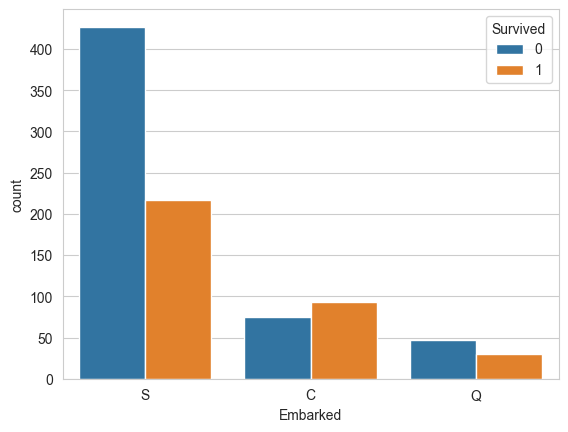

In [21]:
def cat_bivariate(col):
    print(col)
    print(df.groupby(target_col)[col].value_counts().sort_index())
    sns.countplot(data=df, x=col, hue=target_col)
    plt.show()

for col in cat_cols:
    cat_bivariate(col)

Age


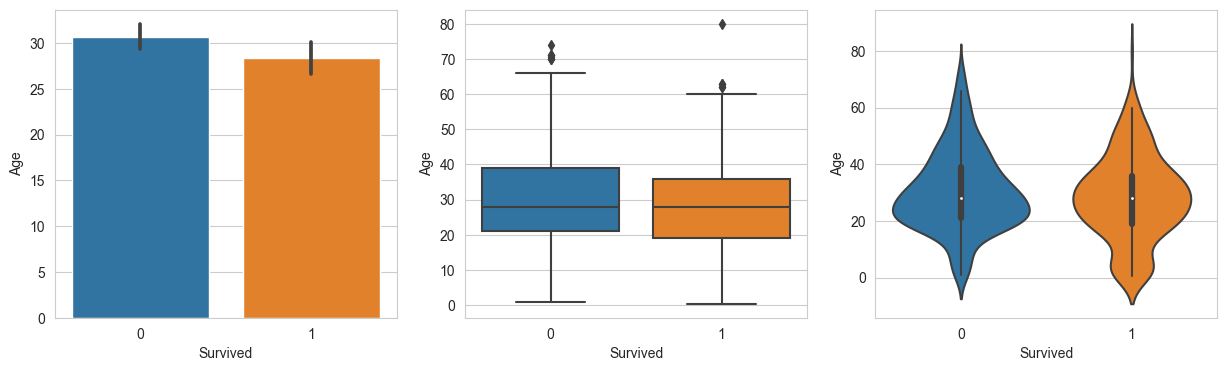

SibSp


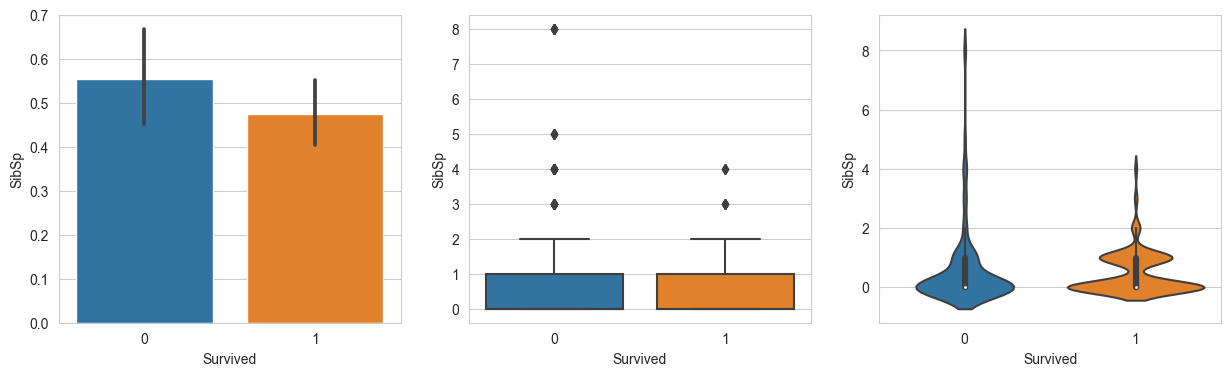

Parch


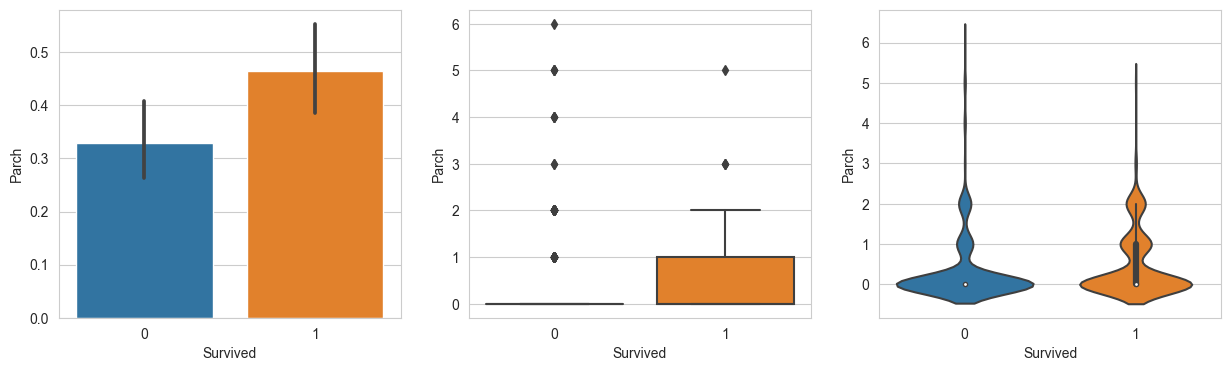

Fare


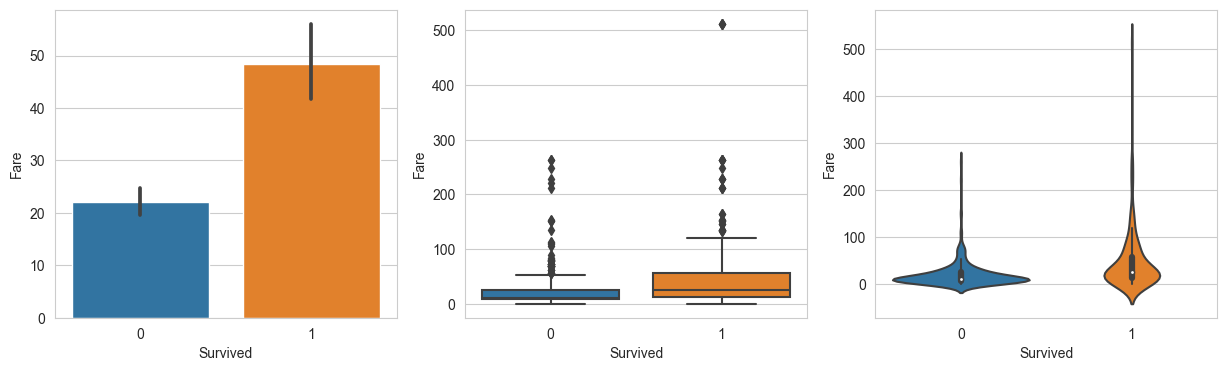

In [24]:
def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.barplot(data=df, x=target_col, y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df, x=target_col, y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=target_col, y=col)
    plt.show()

for col in num_cols:
    num_bivariate(col)

<AxesSubplot:>

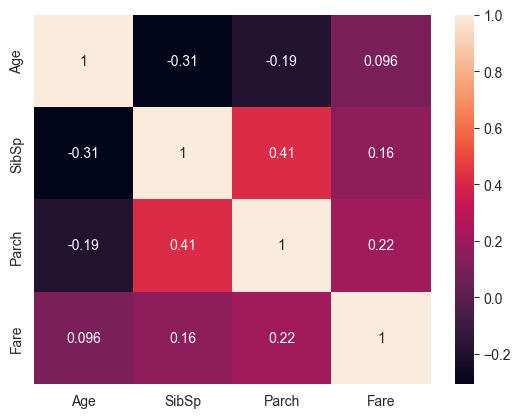

In [25]:
sns.heatmap(df[num_cols].corr(), annot=True)

## Mulivariate analysis

In [30]:
from random import choice
p_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']


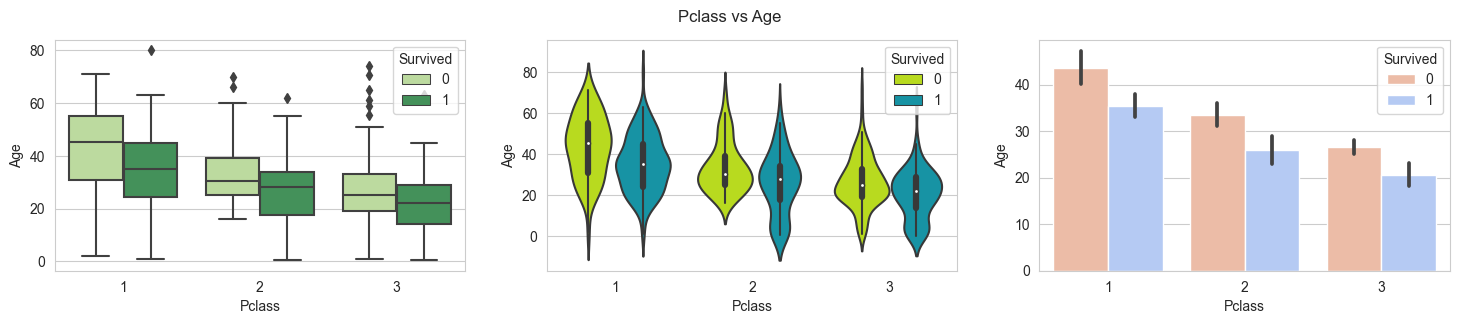

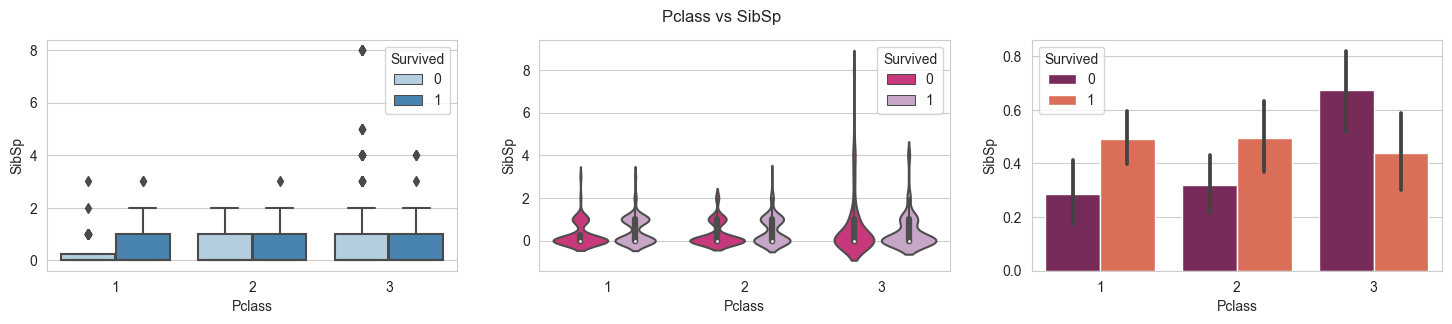

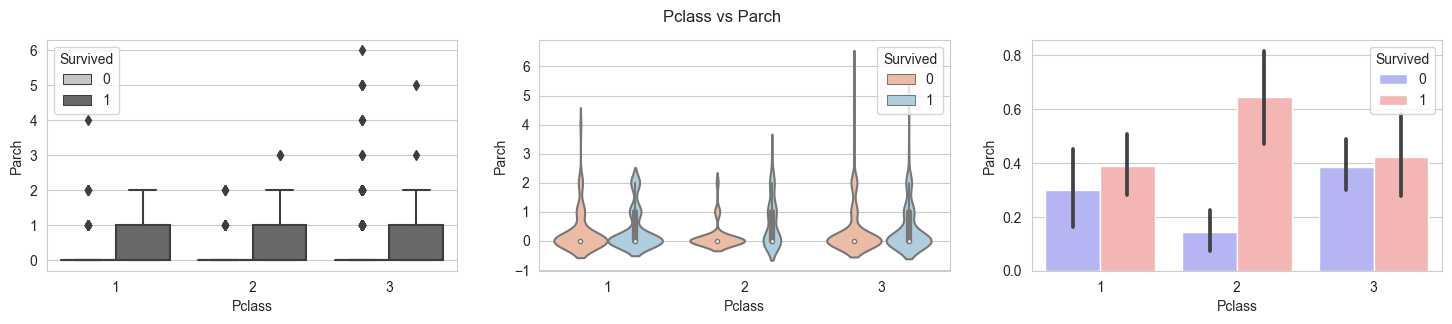

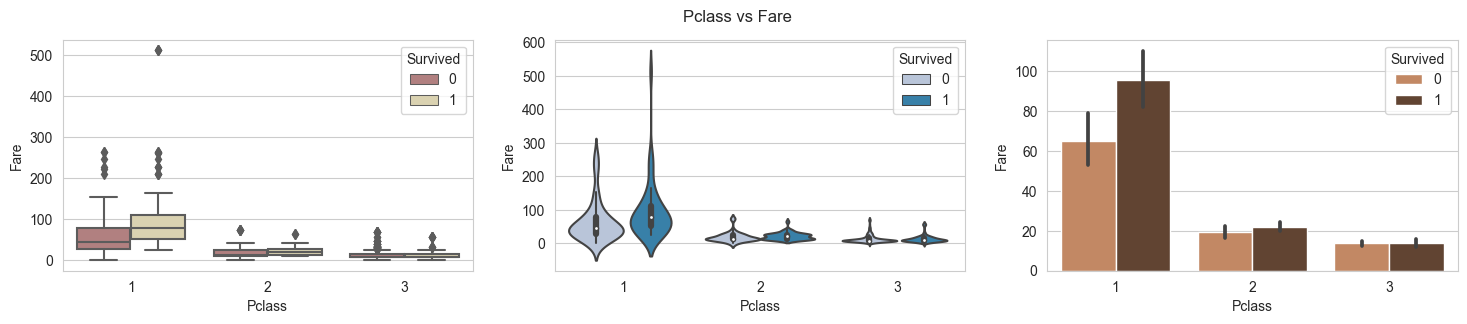

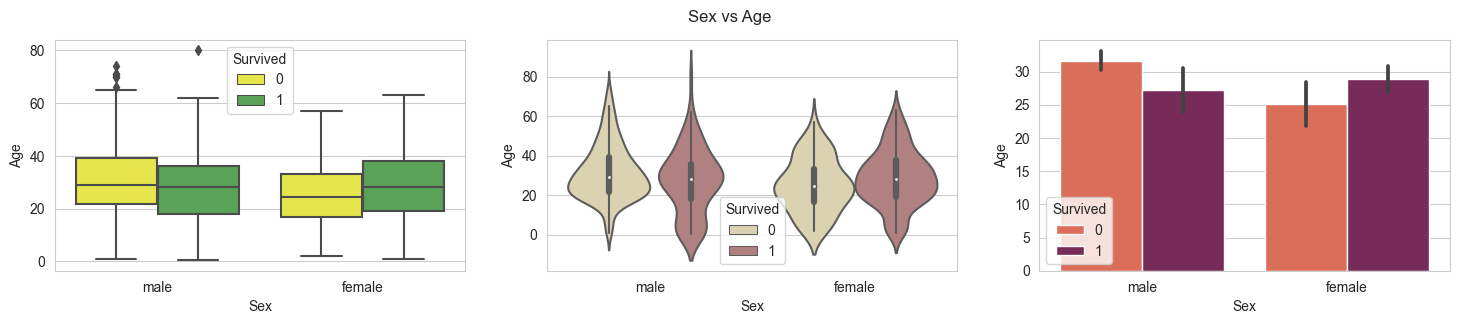

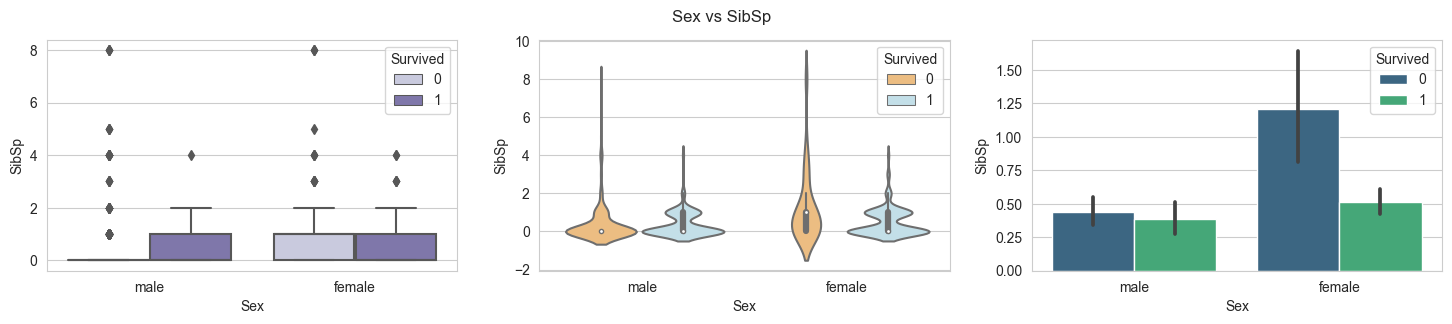

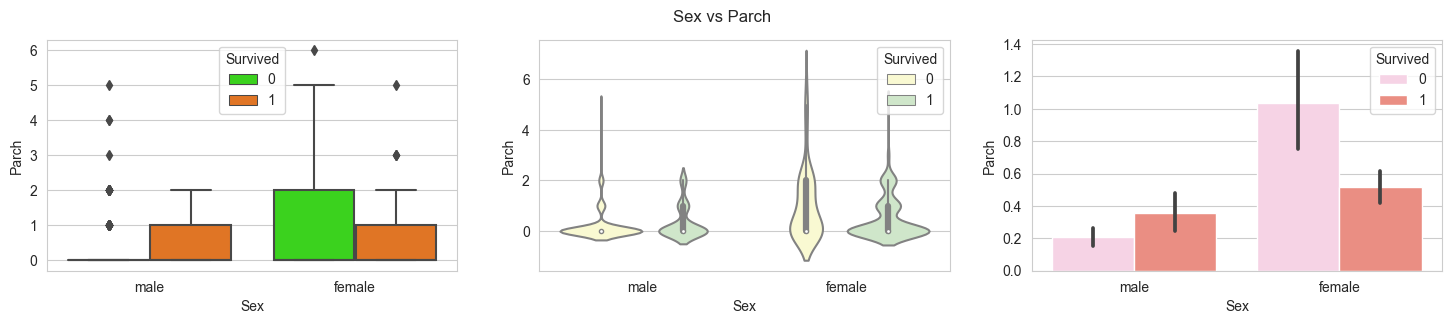

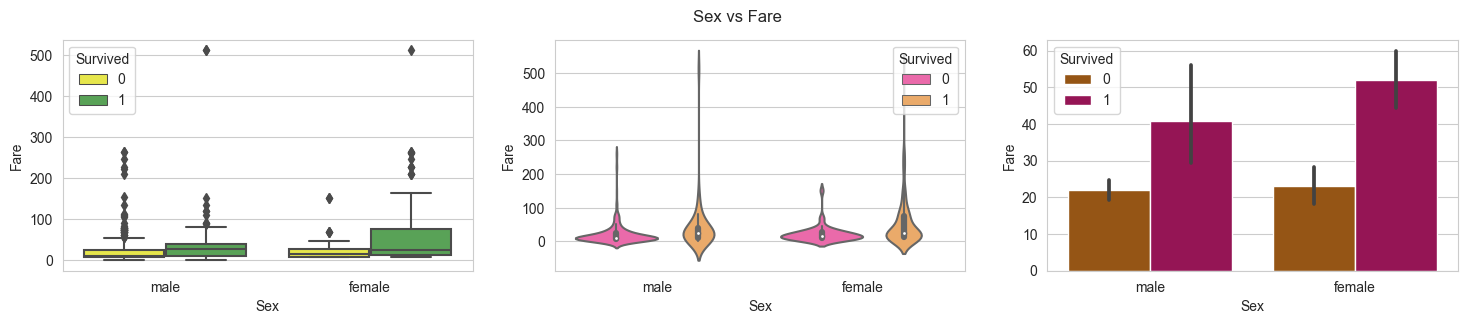

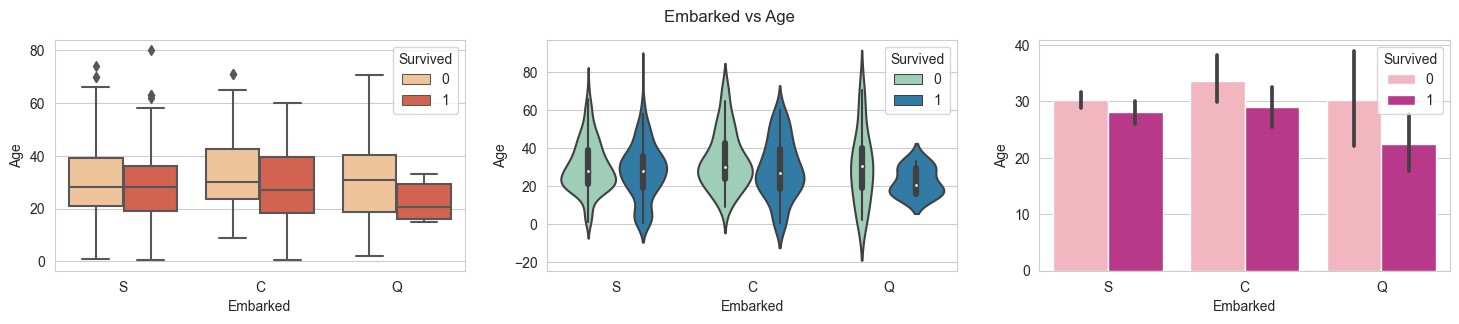

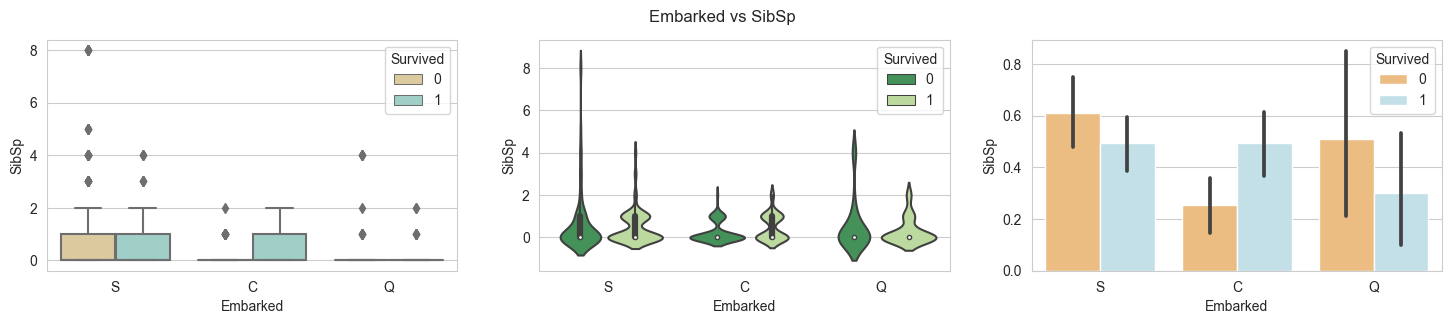

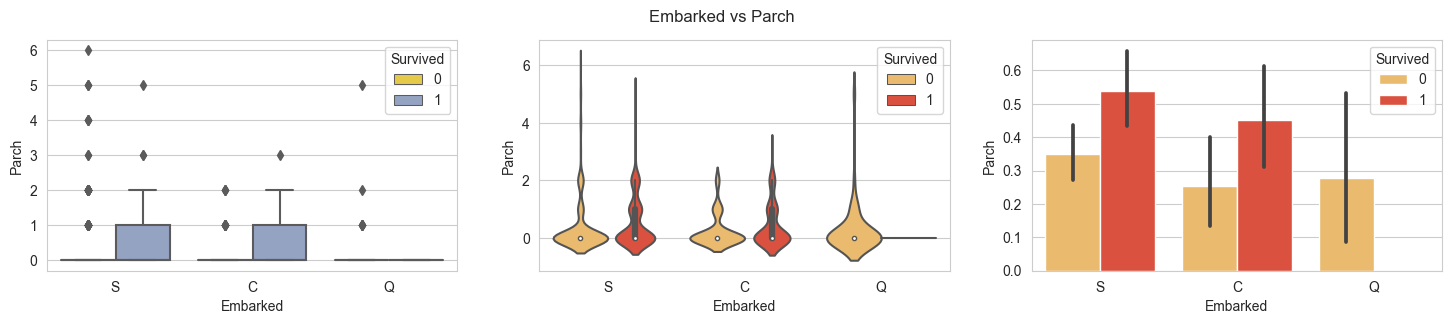

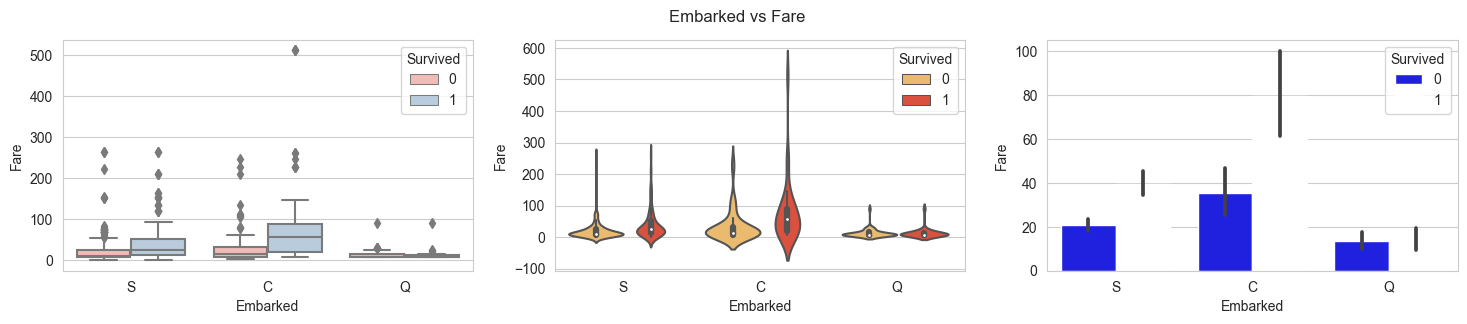

In [33]:
for col in cat_cols:
    if col == target_col:
        continue
    for ncol in num_cols:
        plt.figure(figsize=(18,3))
        plt.suptitle(f'{col} vs {ncol}')
        plt.subplot(1,3,1)
        sns.boxplot(
            data= df, x= col, y=ncol,
            hue= target_col, palette= choice(p_list)
        )
        plt.subplot(1,3,2)
        sns.violinplot(
            data= df, x= col, y=ncol, hue= target_col, palette= choice(p_list)
        )
        plt.subplot(1,3,3)
        sns.barplot(
            data= df, x= col, y=ncol, hue= target_col, palette= choice(p_list)
        )
        plt.show()

In [35]:
df.drop(drop_cols, axis=1 , inplace= True)

#### Missing Data

In [36]:
# missing data identification
pd.isnull(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False


In [37]:
pd.isnull(df).sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [38]:
100*pd.isnull(df).sum()/len(df)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

## Missing data strategy

identify missing data
DIscard the columns having too much missing data(>25%)
Treat/ impute the missing entries in columns
        Try to fake entries which doesnt impact overall data
                Fill using Mean values(numerical data)
                Fill using some imputers(Categorical data)
Discard the rows having missing entries, if the missing enties are too less(<5%)

<AxesSubplot:>

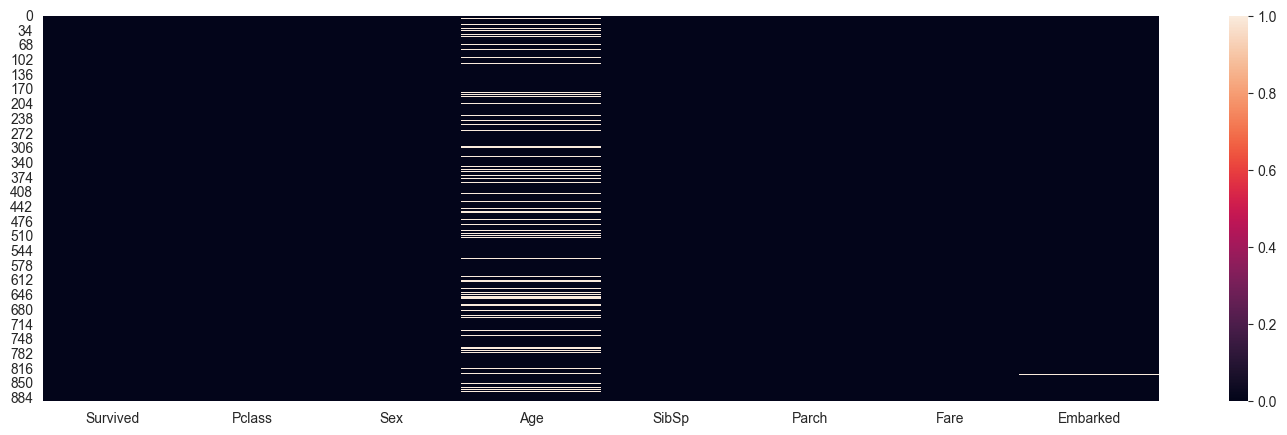

In [40]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

<AxesSubplot:xlabel='Survived', ylabel='Age'>

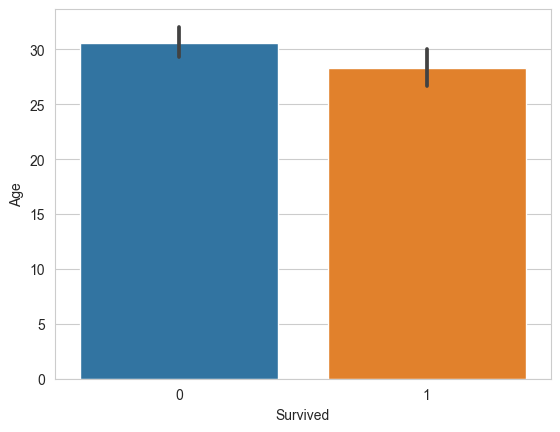

In [41]:
sns.barplot(data=df, x='Survived', y='Age')

In [42]:
df['Age'].mean()

29.69911764705882

In [45]:
df['Age'].fillna(0).mean()
# mean value changed when null is replaced with 0

23.79929292929293

In [44]:
df['Age'].fillna(df['Age'].mean()).mean()
# mean value doesnt change when null is replaced with mean

29.69911764705882

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

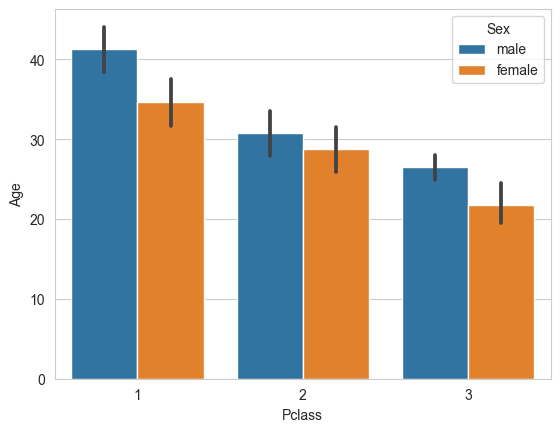

In [47]:
sns.barplot(data=df, y='Age', x='Pclass', hue='Sex')

In [48]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [49]:
# Impute the fake entries in missing Age info

def age_imputer(data):
    age= data['Age']
    pclass= data['Pclass']
    sex= data['Sex']

    if pd.isnull(age):
        return df['Age'][(df['Pclass']==pclass)&(df['Sex']==sex)].mean()
    else:
        return age

df["Age"]= df.apply(age_imputer, axis=1)

<AxesSubplot:>

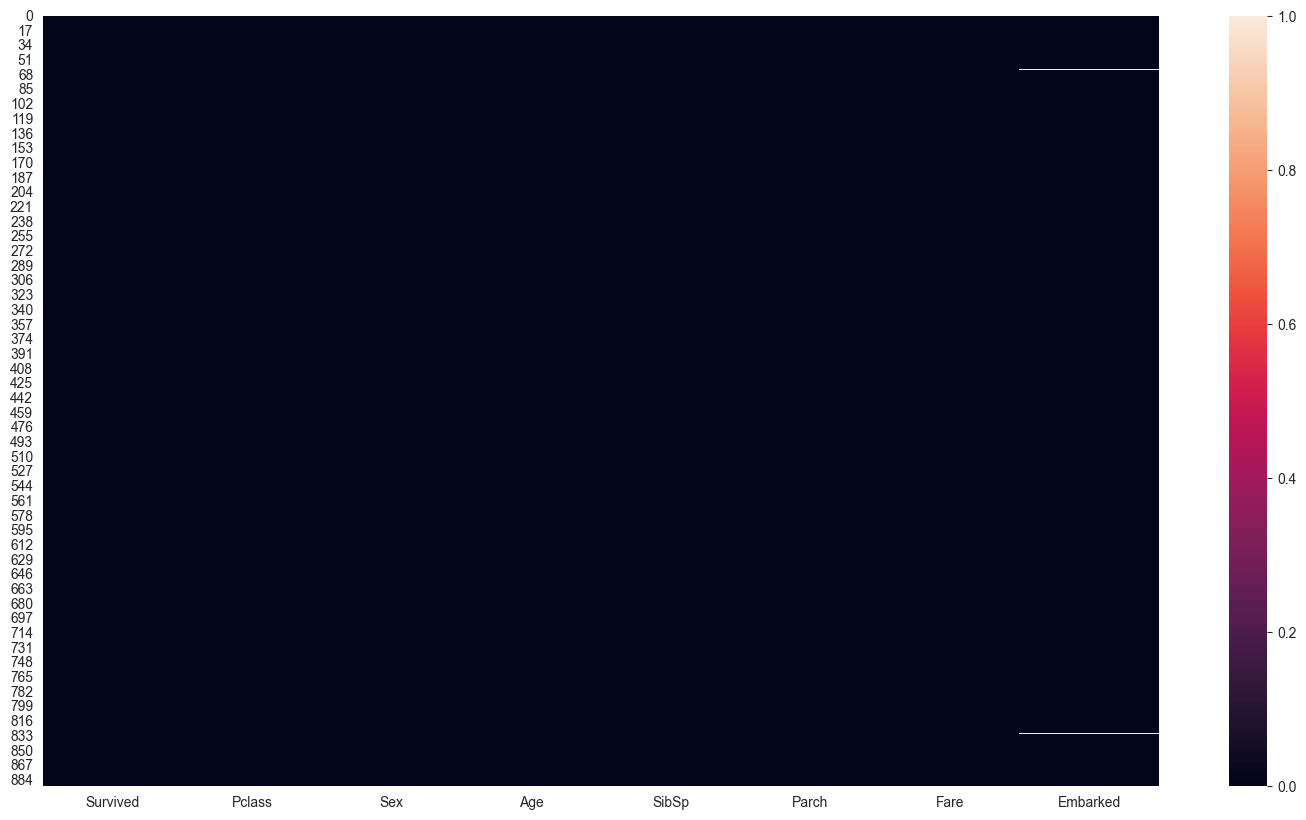

In [50]:
plt.figure(figsize=(18,10))
sns.heatmap(pd.isnull(df))

In [51]:
# Dropping missing entries which were very less (in embarked column)
df.dropna(inplace=True)

<AxesSubplot:>

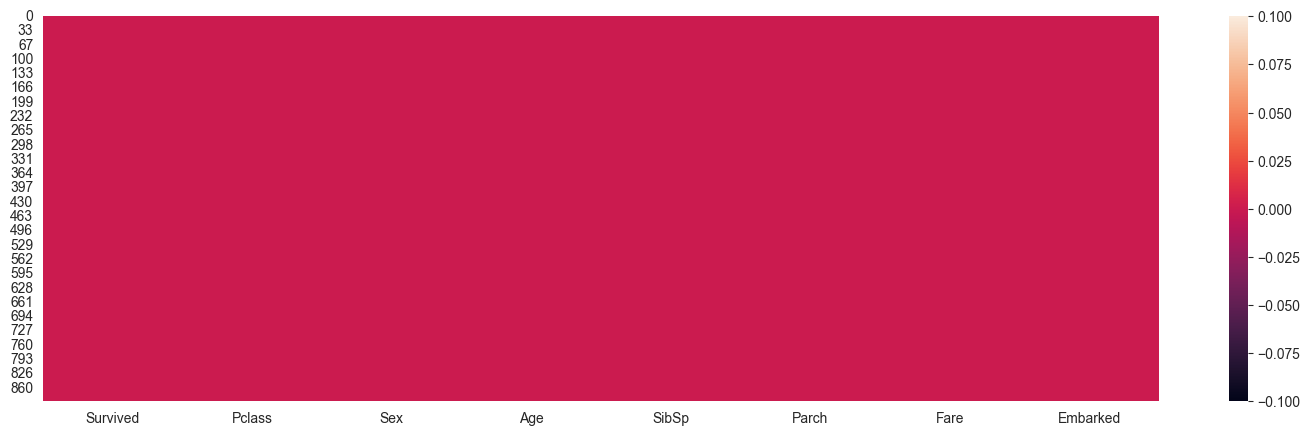

In [52]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

In [55]:
100*pd.isnull(df).sum()/len(df)
#### Thus we got rid of missing data

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

#### String data preprocessing/ creating dummy for string

In [60]:
data= pd.get_dummies(df).drop('Sex_female', axis=1)

In [61]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


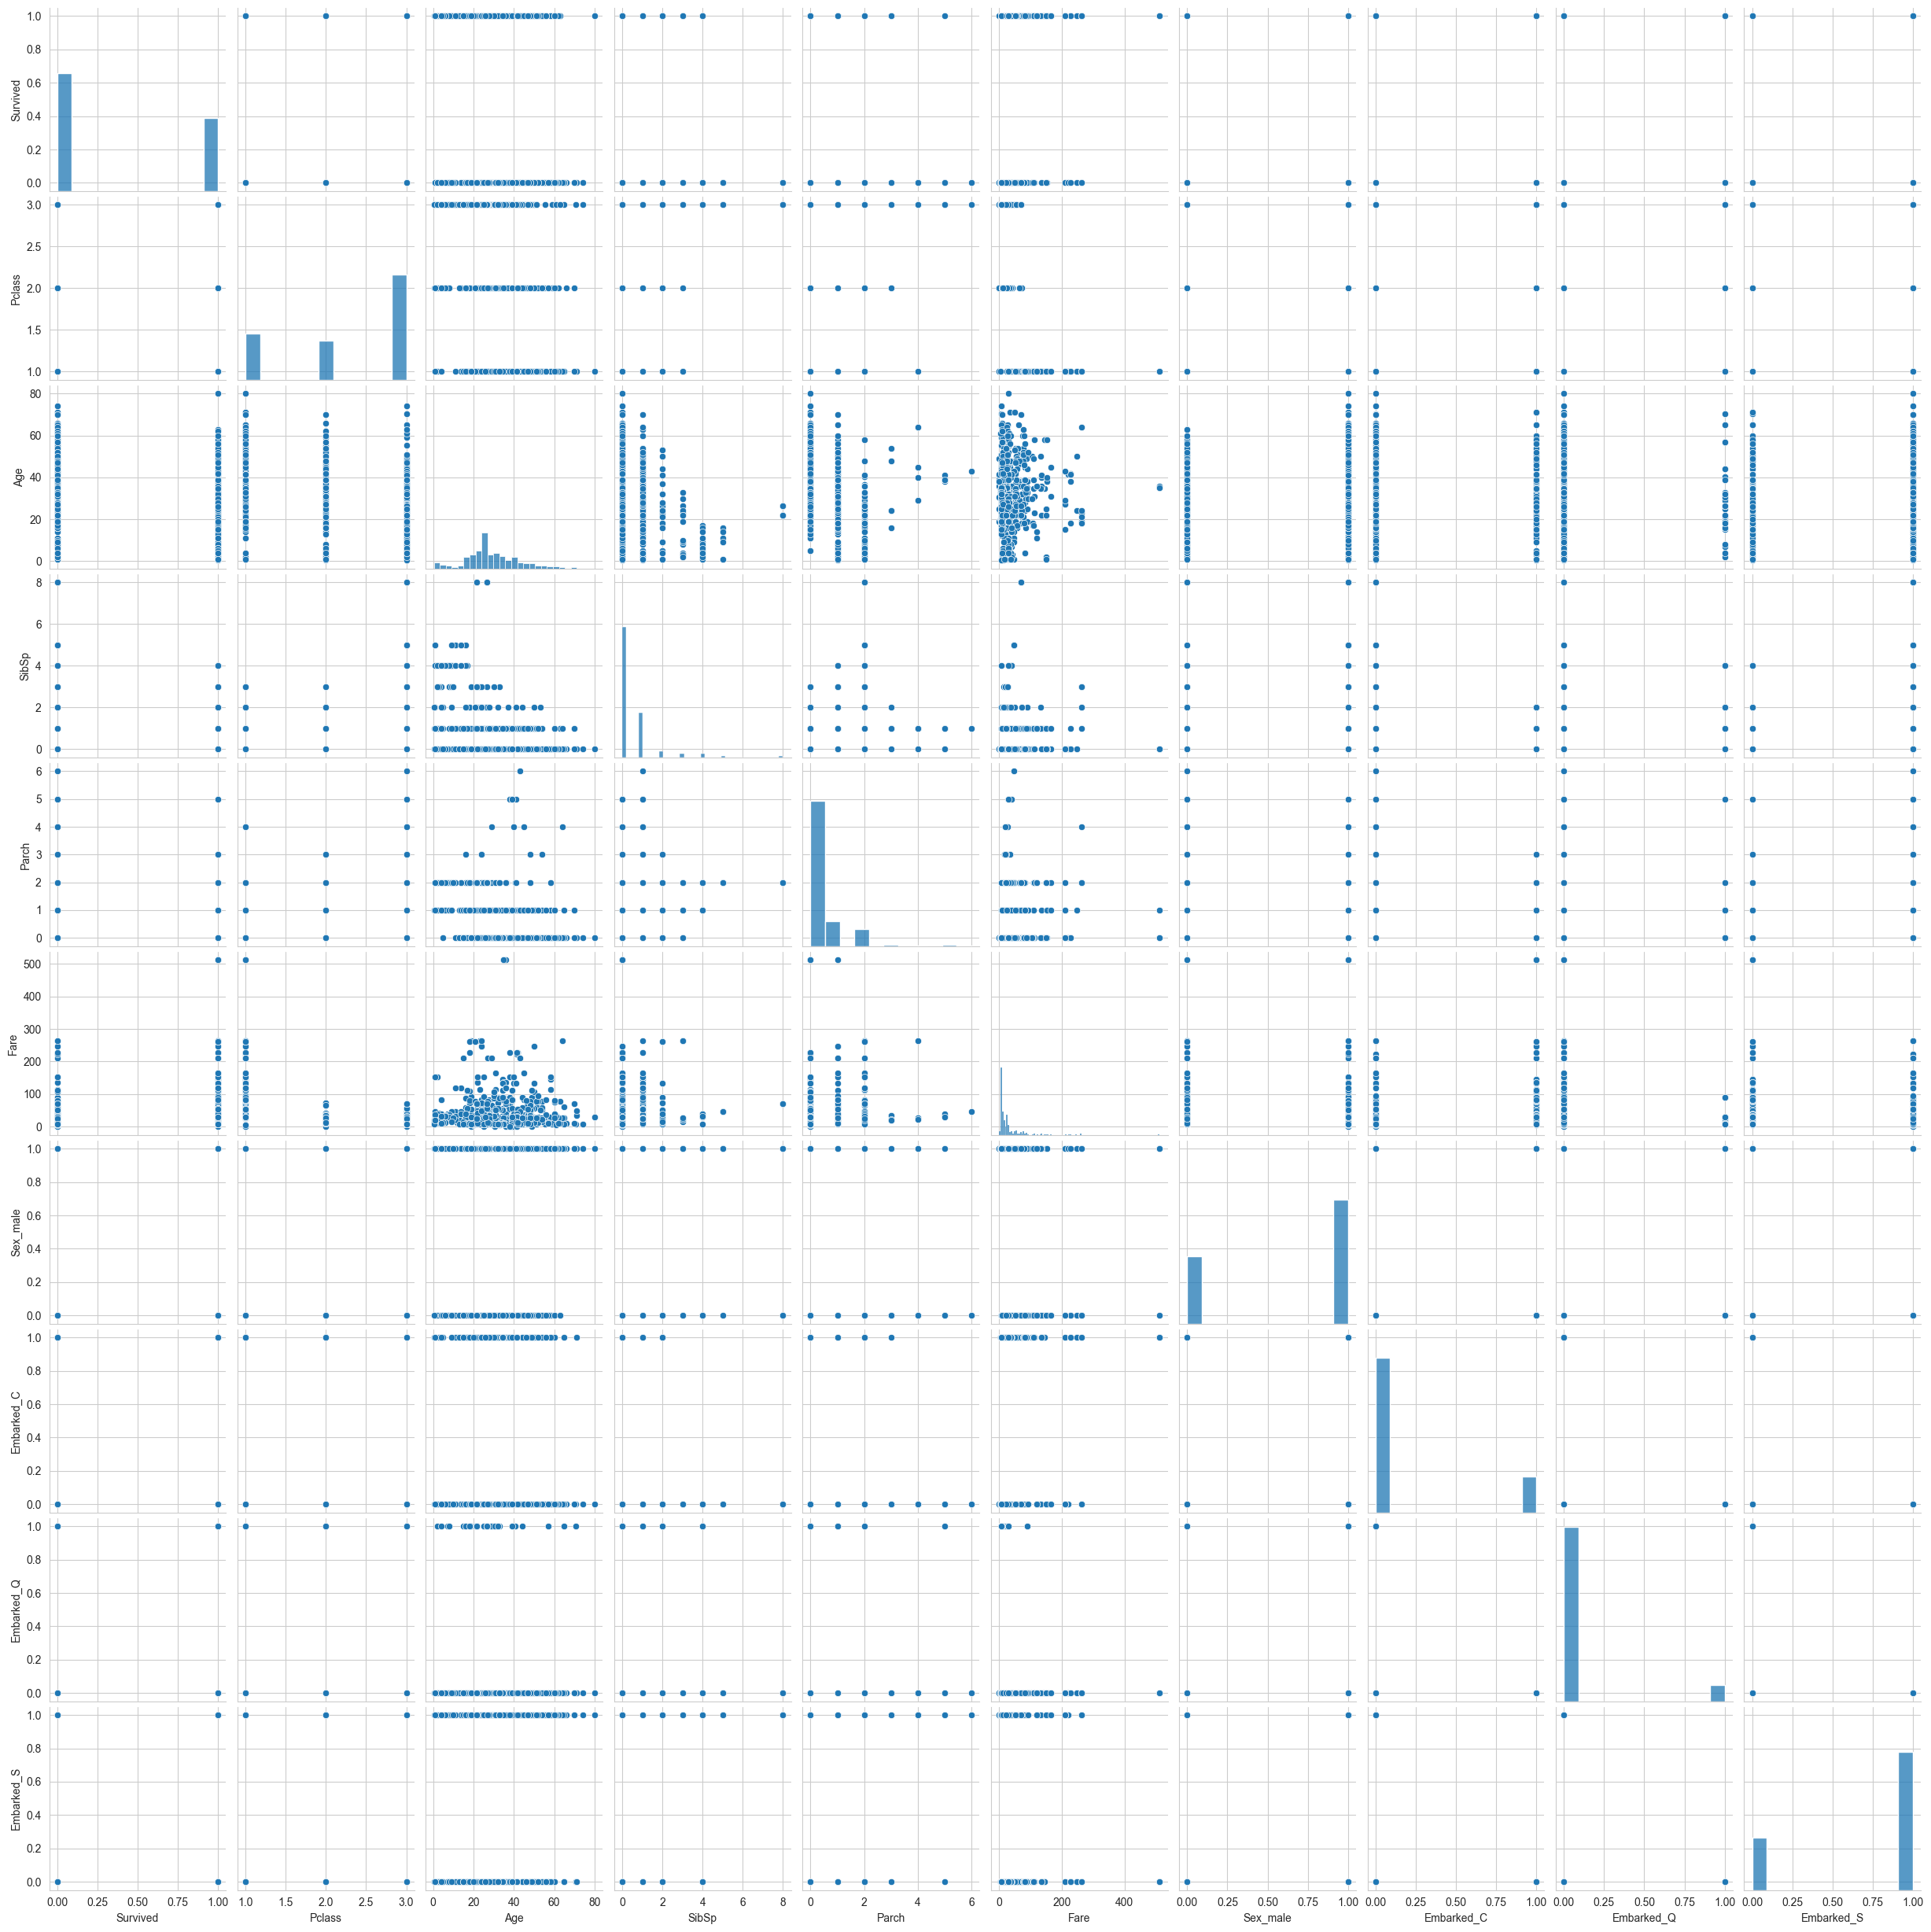

In [63]:
sns.pairplot(data, palette= choice(p_list))

In [64]:
target= data[target_col]
features= data.drop(target_col, axis=1)

In [65]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [66]:
features.head()
# survived column dropped

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


Why we decided logistic regression??
1. initially we thought of doing pairplot, but sinse it is categorical data in target, it is not helpful
2. Since its binary categorical target and /features are mixes of numerical and categorical both, then I can think of logical regression (classification) 

## Machine learning template

#### Data splitting

In [68]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.25, random_state=101)


#### Model creation & training

In [69]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [70]:
#### Model Evaluation

In [71]:
print(round(100*model.score(xtest, ytest)),'%')

83 %


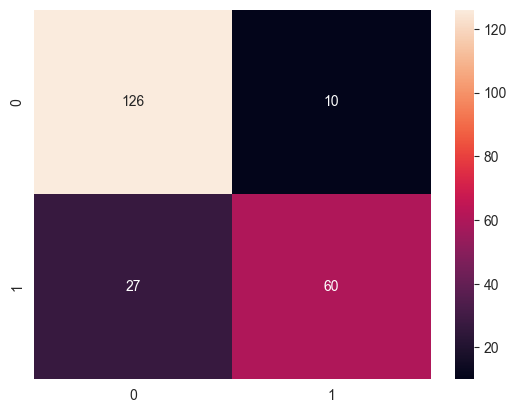

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [73]:
# Confusion Matrix and classification Report
from sklearn.metrics import confusion_matrix, classification_report
ytest_pred = model.predict(xtest)
sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True, fmt='d')
plt.show()

print(classification_report(ytest,ytest_pred))